# Data Transformation

In the data transformation phase, I took charge of cleaning, exploring, and analyzing various aspects of our dataset. To delve deeper into its characteristics, I crafted a series of visualizations, offering insights into genre distribution, theme analysis, and sentiment scores across different dimensions like release years and genres.

My visual explorations encompassed a range of techniques. I utilized bar plots and pie charts to unravel genre distribution, while histograms shed light on the distribution of lyrics length and release dates. Word clouds painted a vivid picture of the most prevalent words in our lyrics. Additionally, bar plots were employed to dissect the distribution of songs with different themes. Through scatter plots, I examined the intricate relationship between themes such as violence and sadness, taking into account the age of songs. Furthermore, violin plots provided a nuanced view of sentiment scores across various genres.

These visualizations not only enriched our understanding of the dataset but also served as a springboard for hypothesis formulation. They laid the groundwork for predictive modeling, particularly in discerning the predictive power of transaction amounts and types in flagging fraudulent activities. Through an iterative process of model development, hyperparameter tuning, and evaluation, I ensured optimal model performance, thereby empowering informed decision-making based on robust predictions.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
cleaned_df = pd.read_csv('../data/cleaned_data.csv')

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'pop'),
  Text(1, 0, 'country'),
  Text(2, 0, 'blues'),
  Text(3, 0, 'rock'),
  Text(4, 0, 'jazz'),
  Text(5, 0, 'reggae'),
  Text(6, 0, 'hip hop')])

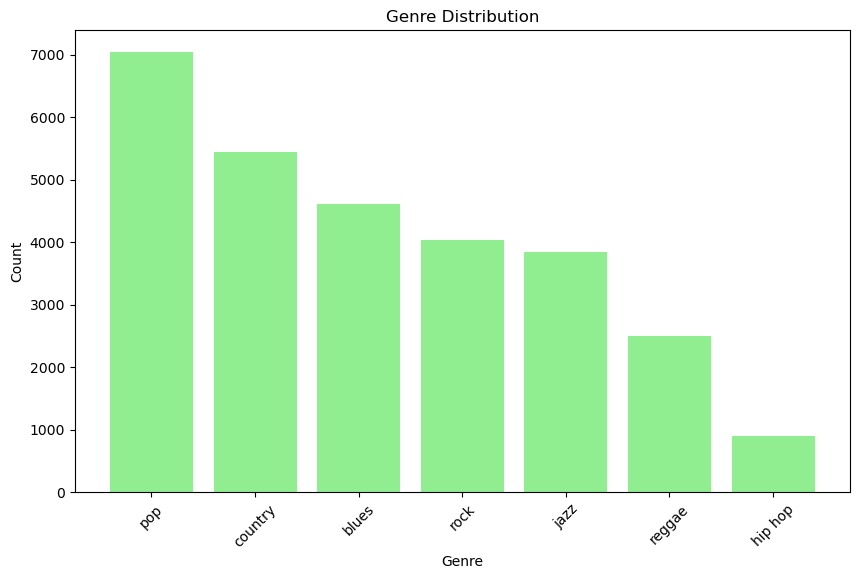

In [125]:
# Calculating the count of each genre
genre_counts = cleaned_df['genre'].value_counts()
plt.figure(figsize=(10, 6))

# Plotting a bar chart representing the genre distribution
plt.bar(genre_counts.index, genre_counts.values, color='lightgreen')

plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Distribution')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'sadness'),
  Text(1, 0, 'world/life'),
  Text(2, 0, 'violence'),
  Text(3, 0, 'obscene'),
  Text(4, 0, 'communication'),
  Text(5, 0, 'music'),
  Text(6, 0, 'night/time'),
  Text(7, 0, 'light/visual perceptions'),
  Text(8, 0, 'romantic'),
  Text(9, 0, 'movement/places'),
  Text(10, 0, 'feelings'),
  Text(11, 0, 'family/spiritual'),
  Text(12, 0, 'dating'),
  Text(13, 0, 'shake the audience'),
  Text(14, 0, 'family/gospel')])

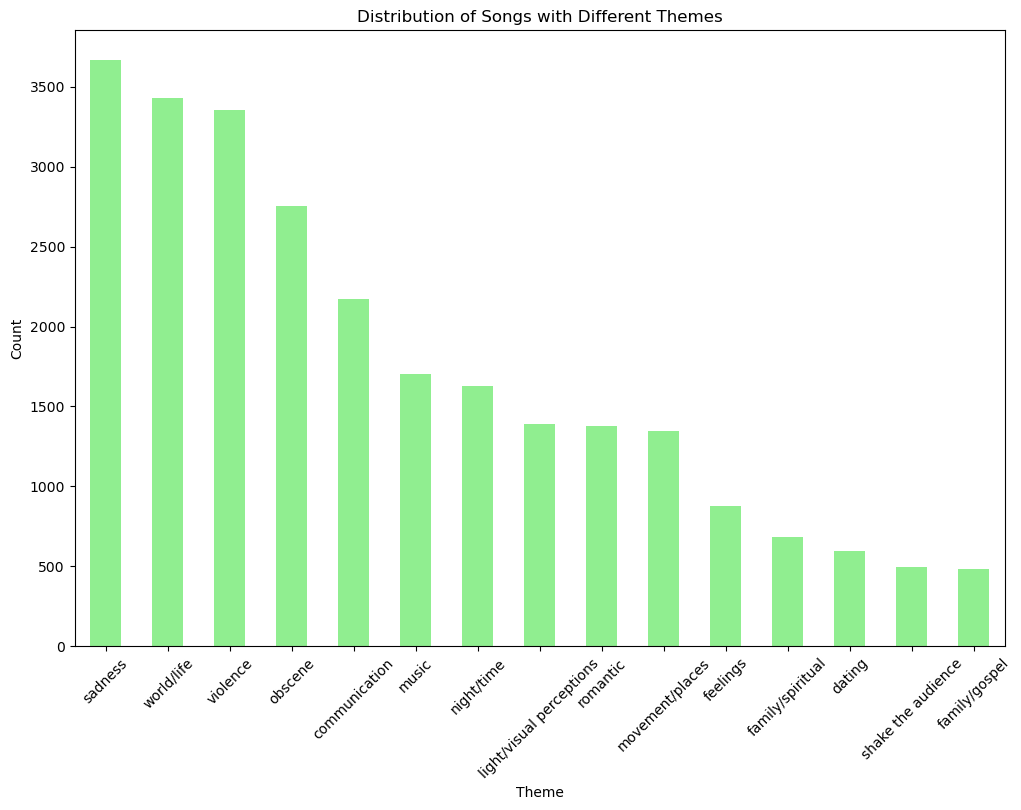

In [126]:
# A list of theme columns to be analyzed
theme_columns = ['dating', 'violence', 'world/life', 'night/time', 'shake the audience', 'family/gospel', 
                 'romantic', 'communication', 'obscene', 'music', 'movement/places', 'light/visual perceptions', 
                 'family/spiritual', 'sadness', 'feelings']

# Calculating the sum of each theme column and sorting them in descending order
theme_counts = cleaned_df[theme_columns].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))

# Plotting a bar chart representing the distribution of songs with different themes
theme_counts.plot(kind='bar', color='lightgreen')

plt.xlabel('Theme')
plt.ylabel('Count')
plt.title('Distribution of Songs with Different Themes')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Lyrics Length Distribution')

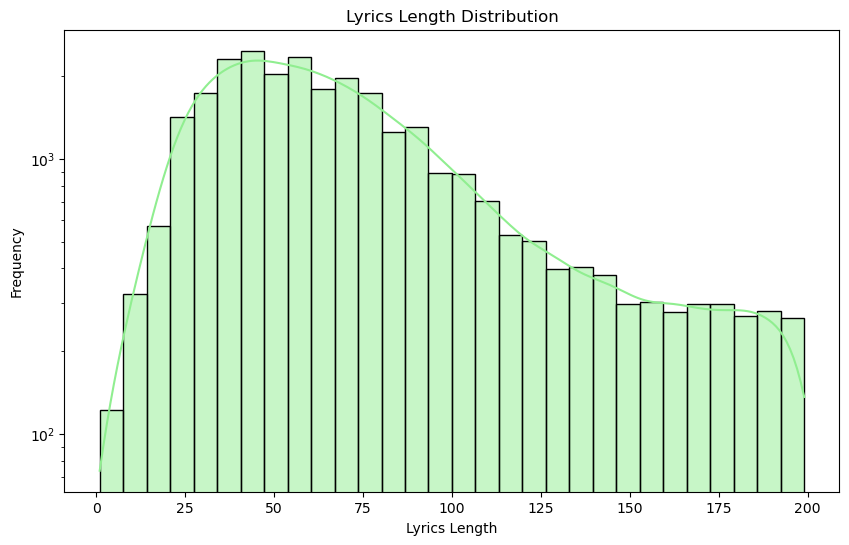

In [127]:
plt.figure(figsize=(10, 6))
# Creating a histogram plot of the 'len' column (lyrics length) and the themes of the songs in this dataset
sns.histplot(cleaned_df['len'], bins=30, kde=True, color='lightgreen', edgecolor='black')

plt.xlabel('Lyrics Length')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Lyrics Length Distribution')

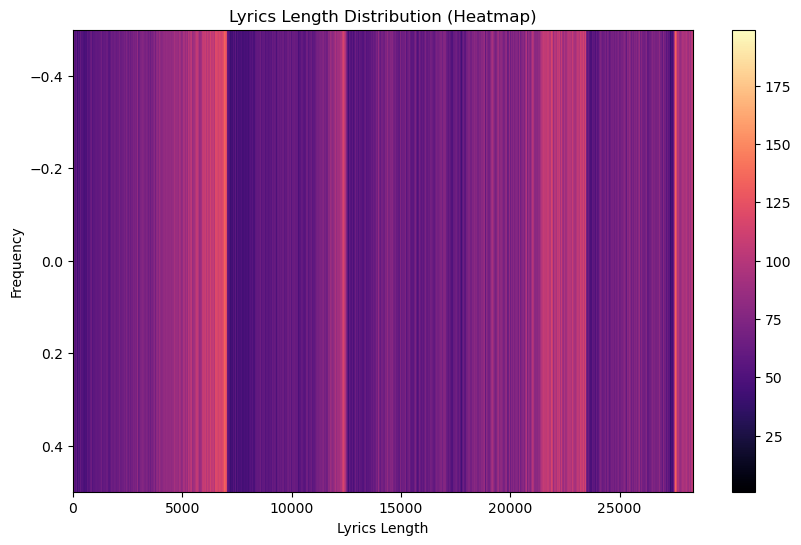

In [128]:
plt.figure(figsize=(10, 6))
# Creating a heatmap of the lyrics length
# This is another way to show the frequency of how long the lyrics of a song is in the "len" column and how it correlates with the frequency of when it appears in a song.
plt.imshow([cleaned_df['len']], cmap='magma', aspect='auto')

plt.xlabel('Lyrics Length')
plt.ylabel('Frequency')
plt.title('Lyrics Length Distribution (Heatmap)')
plt.colorbar()

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

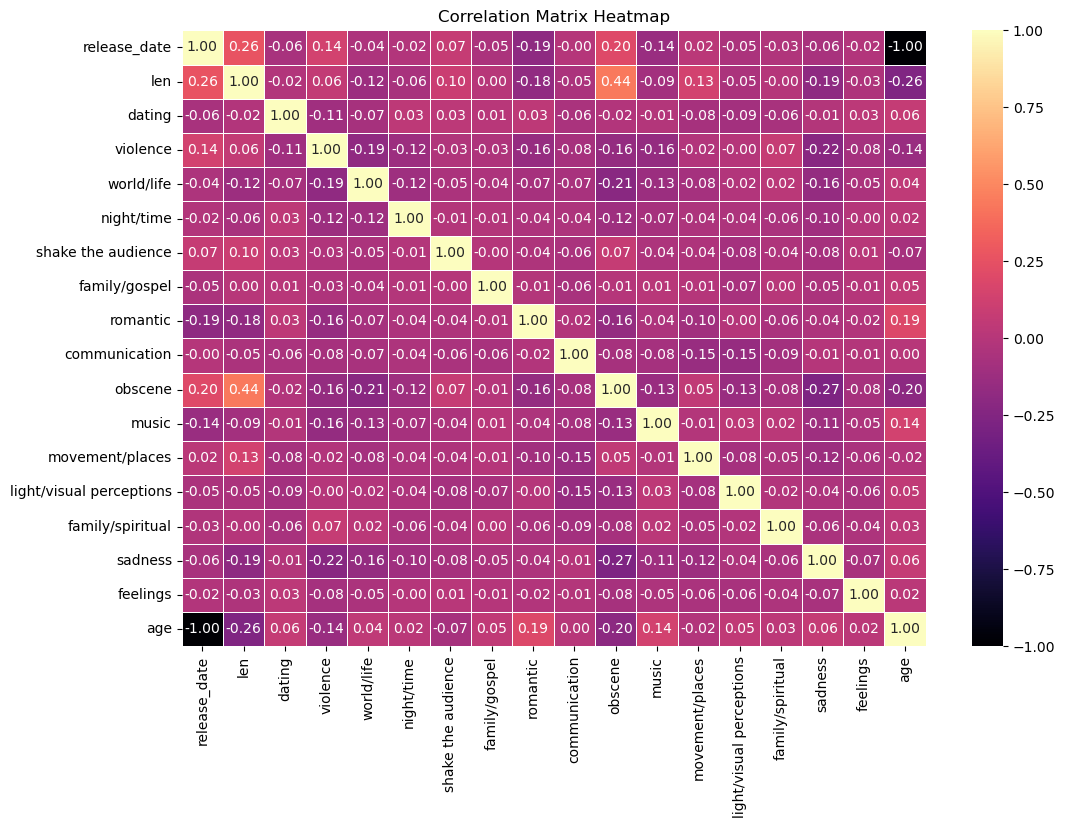

In [129]:
correlation_matrix = cleaned_df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'johnny cash'),
  Text(1, 0, 'ella fitzgerald'),
  Text(2, 0, 'dean martin'),
  Text(3, 0, 'willie nelson'),
  Text(4, 0, 'george jones'),
  Text(5, 0, 'elvis presley'),
  Text(6, 0, 'dolly parton'),
  Text(7, 0, 'waylon jennings'),
  Text(8, 0, 'george strait'),
  Text(9, 0, 'nina simone'),
  Text(10, 0, 'the beach boys'),
  Text(11, 0, 'eric clapton'),
  Text(12, 0, 'phish'),
  Text(13, 0, 'conway twitty'),
  Text(14, 0, 'marty robbins'),
  Text(15, 0, 'aretha franklin'),
  Text(16, 0, 'bob dylan'),
  Text(17, 0, 'merle haggard'),
  Text(18, 0, 'ray price'),
  Text(19, 0, 'the beatles')])

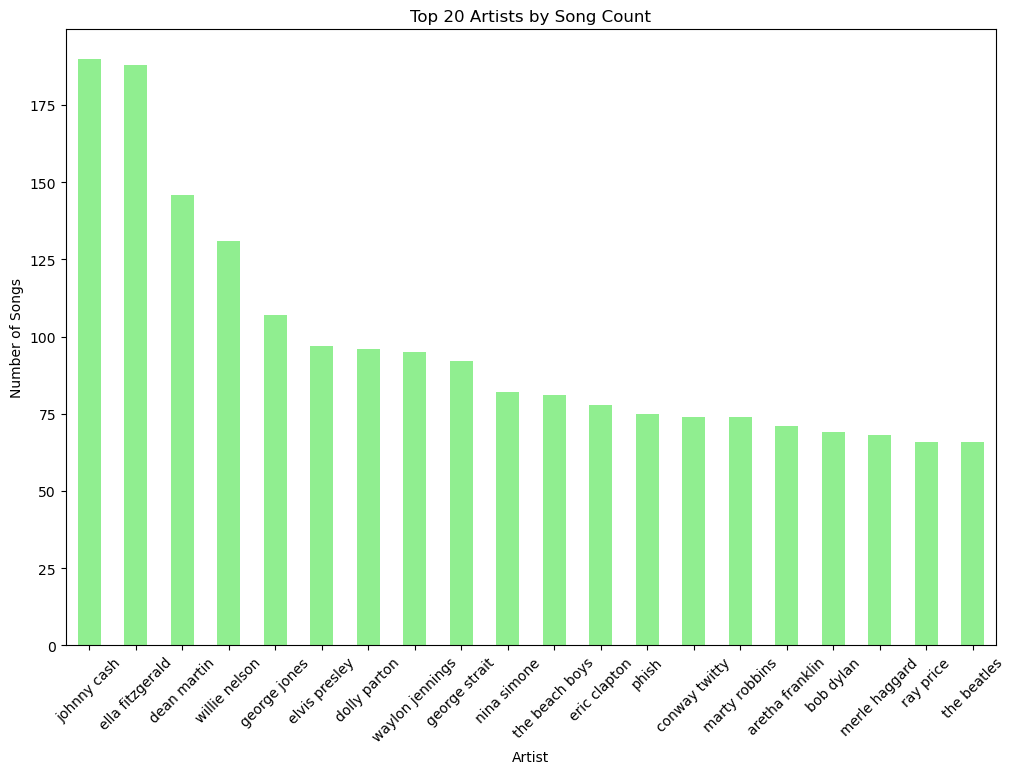

In [130]:
# Calculating the count of songs for each artist in the x-axis and sorting them in descending order
artist_counts = cleaned_df['artist_name'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12, 8))

# Plotting the top 20 artists by song count as a bar plot
artist_counts[:20].plot(kind='bar', color='lightgreen')

plt.xlabel('Artist')
plt.ylabel('Number of Songs')
plt.title('Top 20 Artists by Song Count')
plt.xticks(rotation=45)

Text(0, 0.5, '')

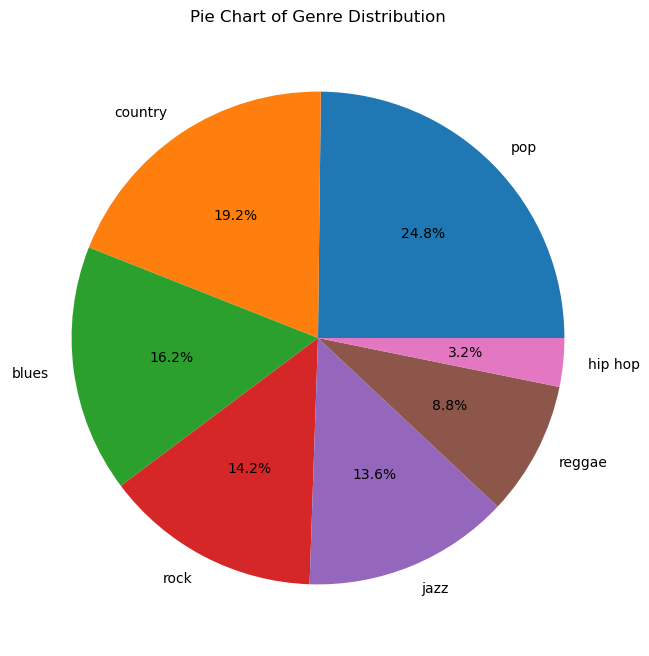

In [131]:
plt.figure(figsize=(8, 8))
# Plotting the pie chart of genre distribution using the value counts of the 'genre' column
cleaned_df['genre'].value_counts().plot(kind='pie', autopct='%1.1f%%')

plt.title('Pie Chart of Genre Distribution')
plt.ylabel('')

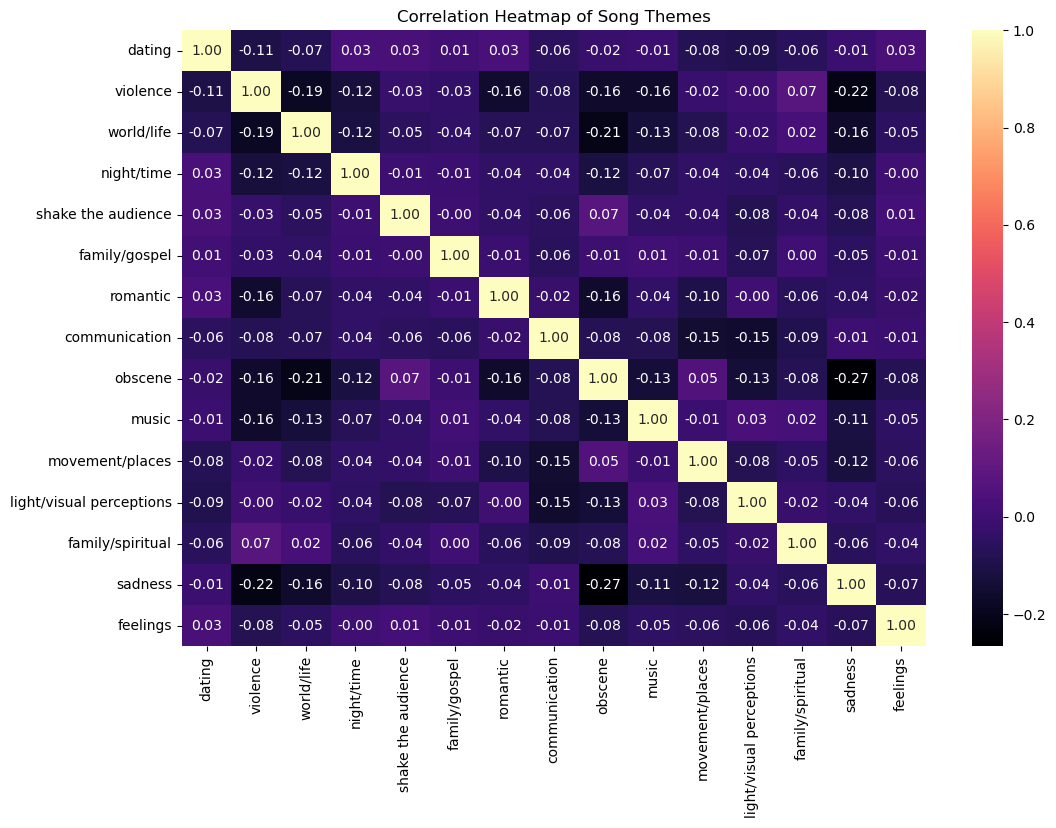

In [132]:
correlation_matrix = cleaned_df[theme_columns].corr()

# Plotting a heatmap that shows the correlation between different themes of the songs in this dataset
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='magma', annot=True, fmt=".2f")
plt.title('Correlation Heatmap of Song Themes')
plt.show()

(-0.5, 799.5, 399.5, -0.5)

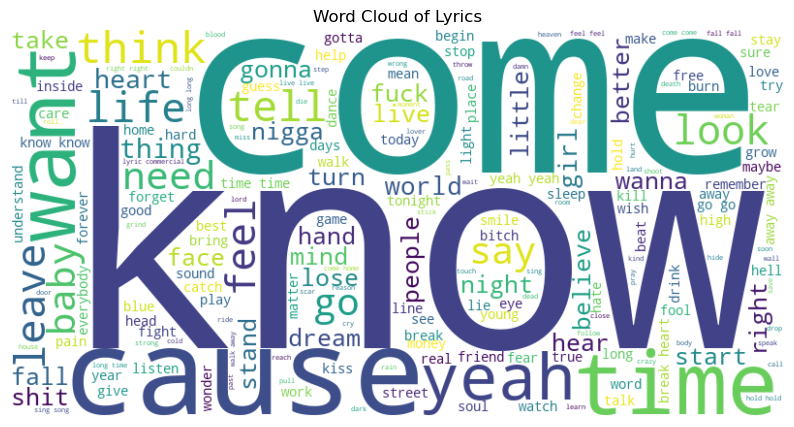

In [133]:
from wordcloud import WordCloud

# Generating a WordCloud of lyrics by joining all lyrics into a single string
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(cleaned_df['lyrics']))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Lyrics')
plt.axis('off')

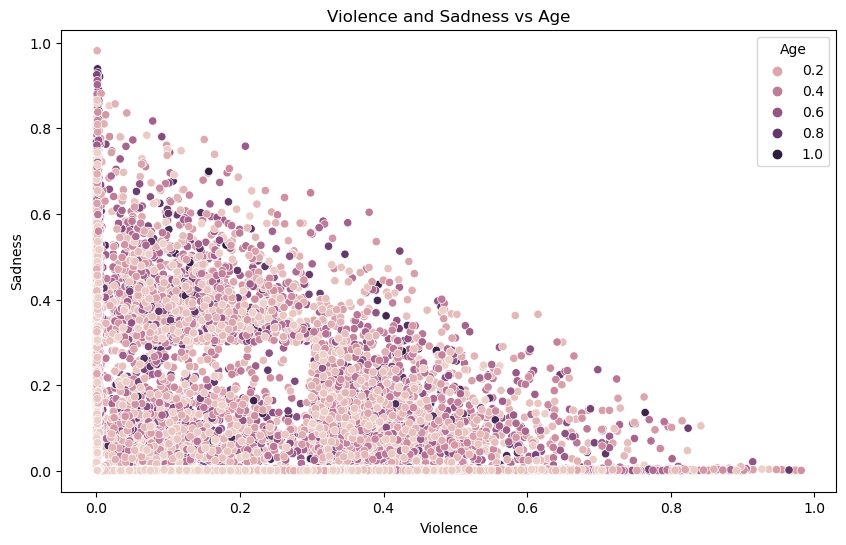

In [134]:
# Creating a scatter plot to visualize the relationship between violence and sadness, with age represented by color
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_df, x='violence', y='sadness', hue='age')

plt.title('Violence and Sadness vs Age')
plt.xlabel('Violence')
plt.ylabel('Sadness')

# Adding a legend with the title 'Age' to distinguish different age groups
plt.legend(title='Age')

(array([1940., 1950., 1960., 1970., 1980., 1990., 2000., 2010., 2020.,
        2030.]),
 [Text(1940.0, 0, '1940'),
  Text(1950.0, 0, '1950'),
  Text(1960.0, 0, '1960'),
  Text(1970.0, 0, '1970'),
  Text(1980.0, 0, '1980'),
  Text(1990.0, 0, '1990'),
  Text(2000.0, 0, '2000'),
  Text(2010.0, 0, '2010'),
  Text(2020.0, 0, '2020'),
  Text(2030.0, 0, '2030')])

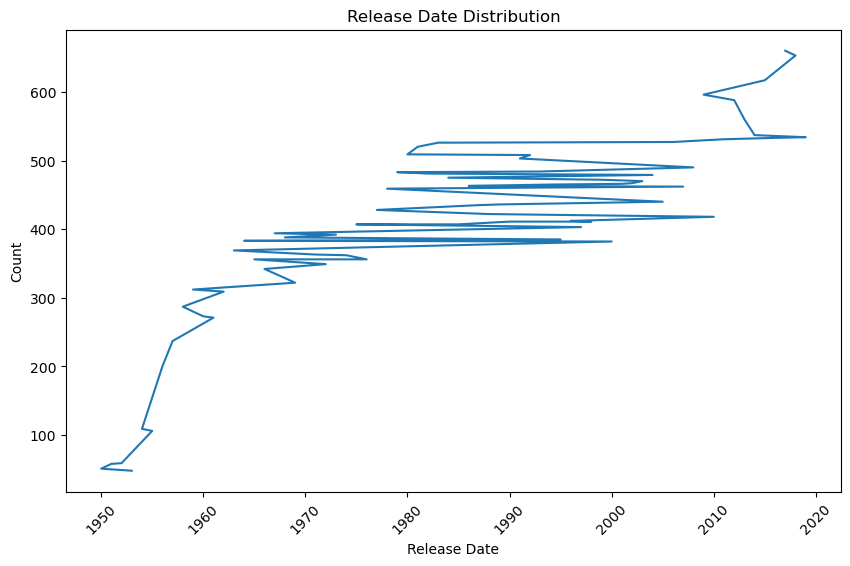

In [135]:
plt.figure(figsize=(10, 6))
# Generating a plot of the distribution of release dates
cleaned_df['release_date'].value_counts().plot()

plt.title('Release Date Distribution')
plt.xlabel('Release Date')
plt.ylabel('Count')
plt.xticks(rotation=45)

Text(0, 0.5, 'Word')

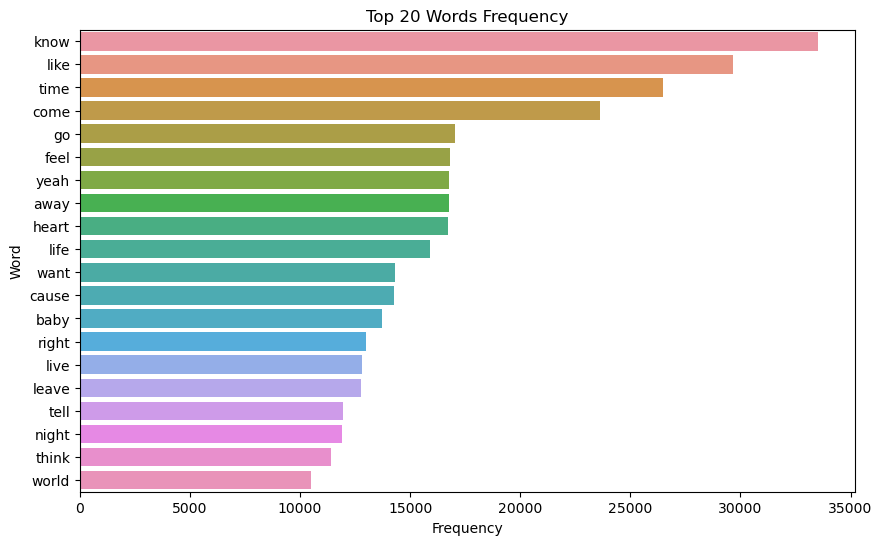

In [136]:
# Performing word frequency analysis on the lyrics column to show the most frequent words that appear in songs in the dataset
top_words = Counter(' '.join(cleaned_df['lyrics']).split()).most_common(20)
top_words_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(10, 6))
sns.barplot(data=top_words_df, x='Frequency', y='Word')
plt.title('Top 20 Words Frequency')
plt.xlabel('Frequency')
plt.ylabel('Word')

Text(0.5, 1.0, 'Distribution of Sentiment Scores by Genre')

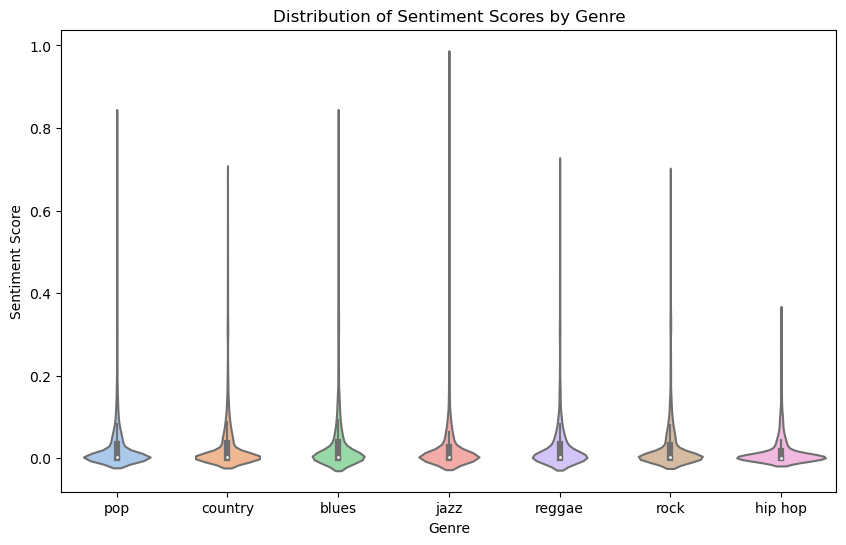

In [137]:
plt.figure(figsize=(10, 6))
# Generating a violin plot to visualize the distribution of sentiment scores by genre
sns.violinplot(x='genre', y='feelings', data=cleaned_df, palette='pastel')
plt.xlabel('Genre')
plt.ylabel('Sentiment Score')
plt.title('Distribution of Sentiment Scores by Genre')

Text(145.72222222222223, 0.5, 'Release Year')

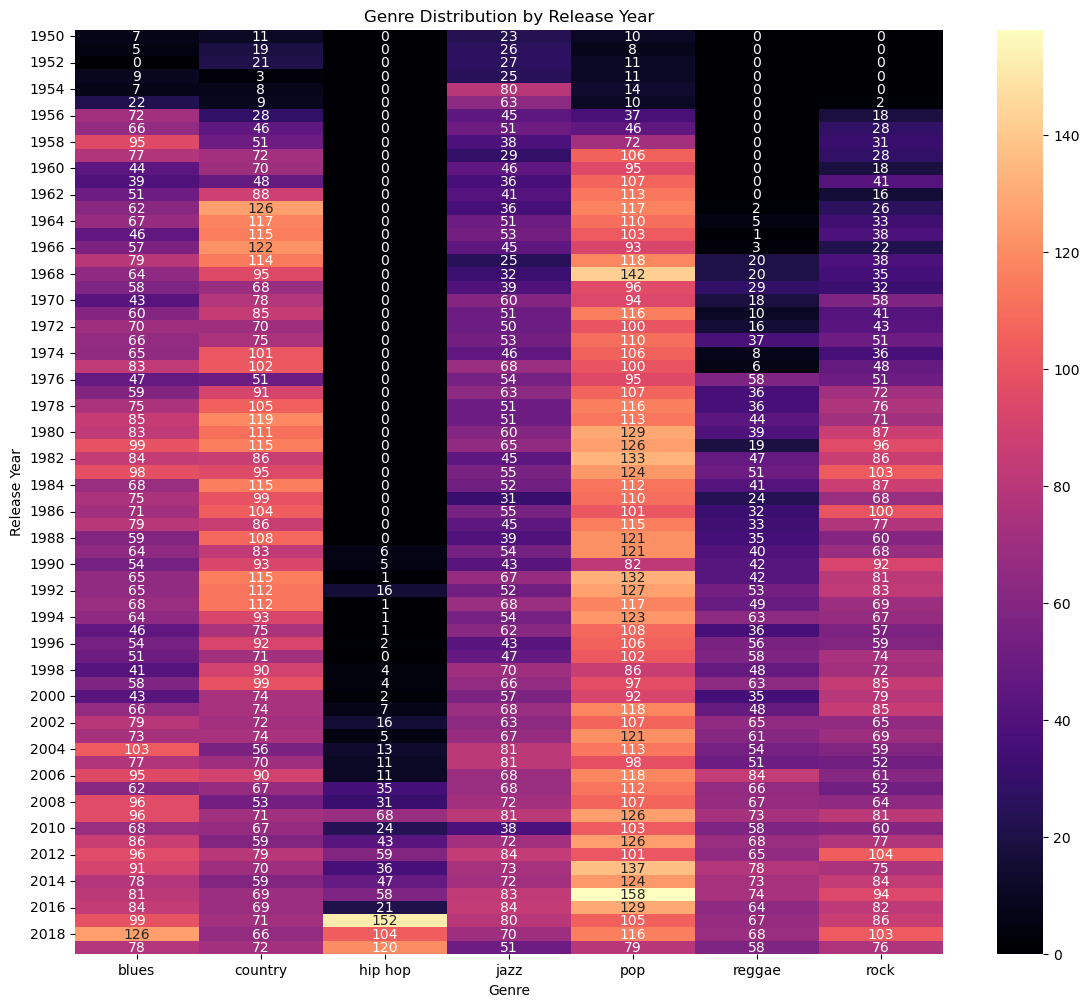

In [138]:
# Rounding release dates of the songs in the dataset to the nearest year
cleaned_df['release_year'] = pd.to_datetime(cleaned_df['release_date'], format='%Y').dt.year

# Creating a pivot table to analyze the distribution of genres by release year
pivot_table = cleaned_df.pivot_table(index='release_year', columns='genre', aggfunc='size', fill_value=0)

# Plotting a heatmap to visualize the genre distribution over release years
plt.figure(figsize=(14, 12))
sns.heatmap(pivot_table, cmap='magma', annot=True, fmt='d')

plt.title('Genre Distribution by Release Year')
plt.xlabel('Genre')
plt.ylabel('Release Year')

# This heatmap creates displays the distribution of music genres over the years based on release dates.
# Each cell in the heatmap represents the count of songs released in a specific genre during a particular year.
# By visualizing this data, you can observe trends in the popularity of different music genres over time.
# It helps in identifying shifts in music preferences and understanding the evolution of music genres throughout the years.

In the analysis of this dataset, several graphs were created to gain a comprehensive understanding of its characteristics and underlying patterns.

**Genre Distribution:** This bar plot visualized the distribution of different music genres, shedding light on the popularity of various genres among the songs. Understanding genre distribution is crucial for identifying trends in music preferences and guiding content recommendations.

**Release Year Distribution:** The line plot explored how the number of songs varied across different release years, revealing trends and patterns in music production over time. This insight helps in understanding the evolution of music trends and preferences.

**Distribution of Songs with Different Themes:** Analyzing the frequency of different themes in songs through a bar plot provided insights into prevalent themes across the dataset and their relative importance. Understanding theme distribution aids in content categorization and recommendation.

**Histogram of Lyrics Length:** This histogram displayed the distribution of lyrics lengths, offering an overview of the variability in song lyrics' length. It helps in understanding the diversity of content and can guide content creation strategies.

**Top 20 Artists by Song Count:** Identifying the top artists with the highest number of songs using a bar plot helps in recognizing the most prolific artists in terms of song production. This insight is valuable for understanding artists' influence and popularity.

**Pie Chart of Genre Distribution:** Presenting genre distribution in the form of a pie chart offers a visual representation of the proportional distribution of genres, facilitating a quick understanding of genre popularity.

**Word Cloud of Lyrics:** Generating a word cloud visualizes the frequency of words in song lyrics, providing an engaging representation of common words used in songs. This aids in identifying recurring themes or topics in lyrics.

**Scatter Plot of Violence and Sadness vs Age:** This scatter plot explores the relationship between violence, sadness, and age, investigating potential correlations between sentiment scores and age groups. Understanding sentiment distribution by age group helps in audience segmentation and targeting.

**Release Date Distribution:** Reexamining the distribution of song release dates using a line plot reinforces insights into the temporal distribution of song releases, aiding in understanding music production trends over time.

**Top 20 Words Frequency:** Analyzing the frequency of the top words in song lyrics through a bar plot identifies the most common words appearing in lyrics, providing insights into prevalent themes or topics.

**Distribution of Sentiment Scores by Genre:** Investigating sentiment score distribution across different genres using a violin plot explores potential differences in sentiment scores among various music genres, offering insights into genre-specific emotional content.

**Genre Distribution by Release Year (Heatmap):** Visualizing genre distribution over different release years using a heatmap highlights changes in genre popularity over time and potential trends, aiding in understanding genre evolution.

**Word Frequency Analysis:** Conducting word frequency analysis helps identify the most common words in song lyrics, providing insights into prevalent themes or topics.

**Violence and Sadness vs Age (Scatter Plot):** Revisiting the relationship between sentiment scores and age groups through a scatter plot further explores potential correlations.

**Release Date Distribution (Line Plot):** Re examining the distribution of song release dates reinforces insights into music production trends over time.